<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


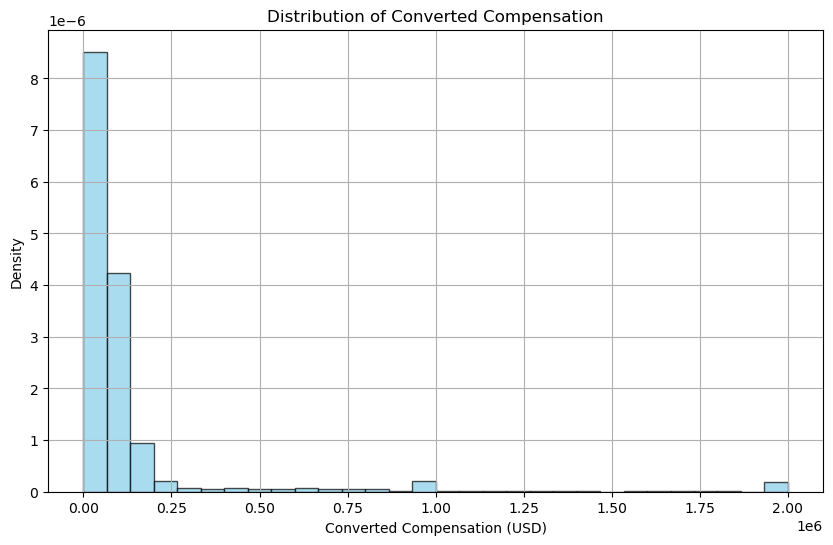

In [3]:
# your code goes here
import matplotlib.pyplot as plt

# Plot the distribution curve for 'ConvertedComp'
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


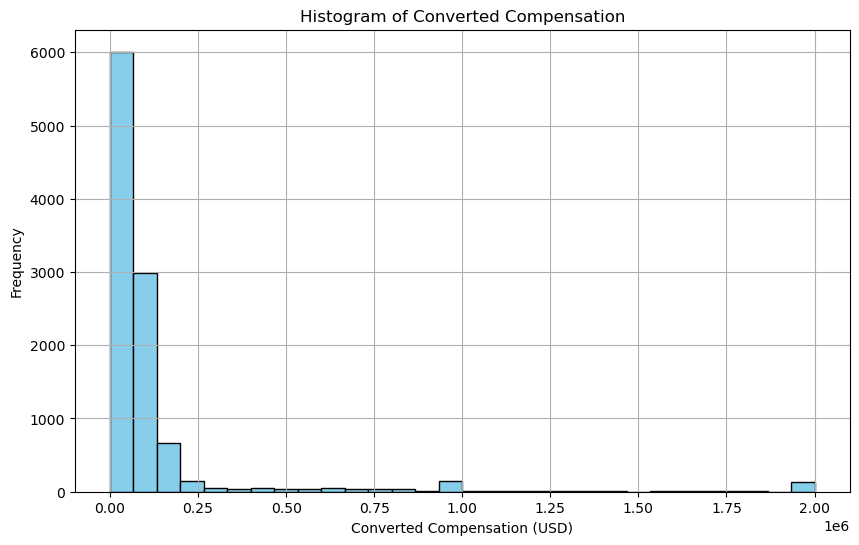

In [4]:
# your code goes here
# Plot histogram for ConvertedComp
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

What is the median of the column `ConvertedComp`?


In [5]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [6]:
# your code goes here
# Filter the DataFrame to include only respondents who identified themselves as 'Man'
male_responders = df[df['Gender'] == 'Man']

# Count the number of unique respondents
num_male_responders = male_responders['Respondent'].nunique()

print("Number of responders who identified themselves only as a Man:", num_male_responders)

Number of responders who identified themselves only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# your code goes here
# Filter the DataFrame to include only respondents who identified themselves as 'Man'
woman_responders = df[df['Gender'] == 'Woman']

# Count the number of unique respondents
num_woman_responders = woman_responders['Respondent'].nunique()

print("Number of responders who identified themselves only as a Woman:", num_woman_responders)


Number of responders who identified themselves only as a Woman: 731


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [10]:
# your code goes here
# Compute the five-number summary for the 'Age' column
five_num_summary = df['Age'].describe(percentiles=[.25, .5, .75])

# Extract the required statistics
minimum = five_num_summary['min']
q1 = five_num_summary['25%']
median = five_num_summary['50%']
q3 = five_num_summary['75%']
maximum = five_num_summary['max']

# Print the five-number summary
print("Minimum:", minimum)
print("Q1 (First Quartile):", q1)
print("Median:", median)
print("Q3 (Third Quartile):", q3)
print("Maximum:", maximum)

Minimum: 16.0
Q1 (First Quartile): 25.0
Median: 29.0
Q3 (Third Quartile): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


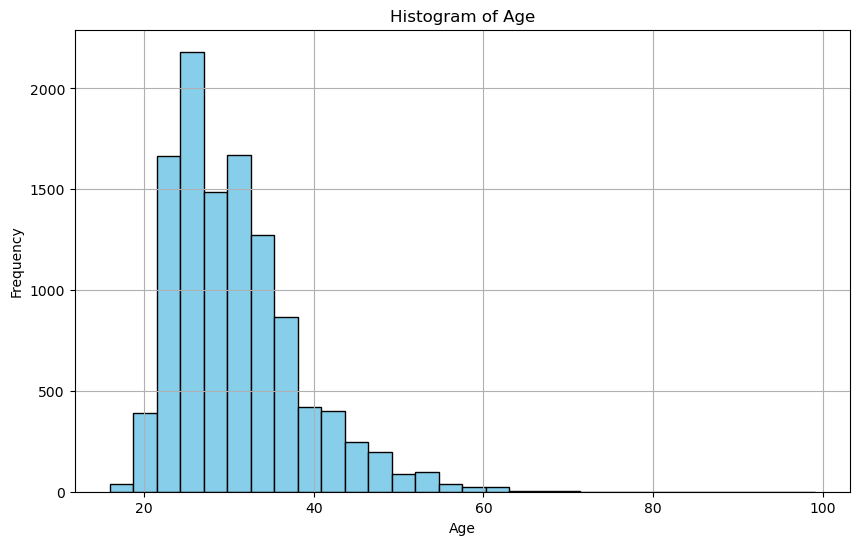

In [11]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


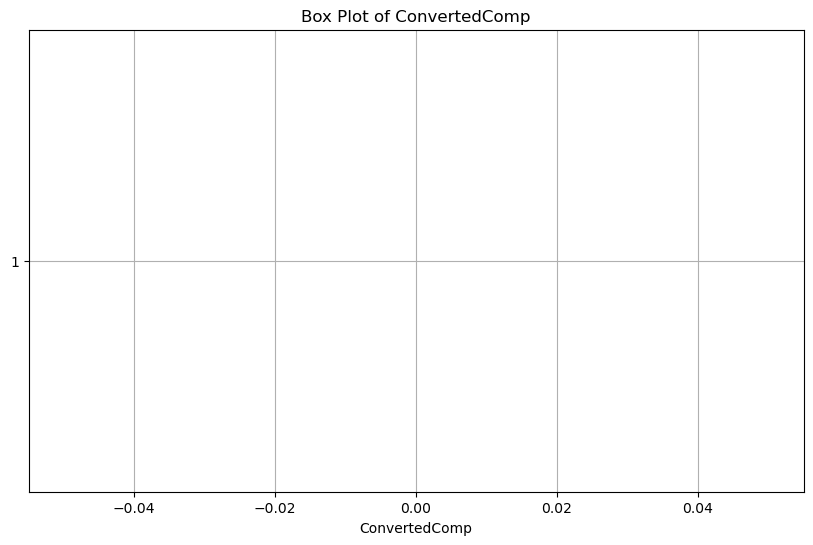

In [13]:
# your code goes here
import matplotlib.pyplot as plt

# Plot box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'], vert=False)
plt.title('Box Plot of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.grid(True)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [15]:
# your code goes here
import numpy as np

# Replace missing values with median
median_value = df['ConvertedComp'].median()
df['ConvertedComp'].fillna(median_value, inplace=True)

# Calculate quartiles
q1 = np.percentile(df['ConvertedComp'], 25)
q3 = np.percentile(df['ConvertedComp'], 75)

# Calculate IQR
iqr = q3 - q1

print("Interquartile Range (IQR):", iqr)


Interquartile Range (IQR): 65984.0


Find out the upper and lower bounds.


In [16]:
# your code goes here
# Calculate quartiles
q1 = np.percentile(df['ConvertedComp'], 25)
q3 = np.percentile(df['ConvertedComp'], 75)

# Calculate IQR
iqr = q3 - q1

# Calculate lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: -69960.0
Upper Bound: 193976.0


Identify how many outliers are there in the `ConvertedComp` column.


In [17]:
# your code goes here
# Calculate lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Count outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = outliers.shape[0]

print("Number of outliers in ConvertedComp column:", num_outliers)


Number of outliers in ConvertedComp column: 933


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [18]:
# your code goes here
# Calculate lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Display the shape of the new dataframe to verify outliers have been removed
print("Shape of dataframe without outliers:", df_no_outliers.shape)


Shape of dataframe without outliers: (10465, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [19]:
# your code goes here
# Find correlation between Age and all other numerical columns
age_corr = df.corr()['Age'].sort_values(ascending=False)

# Display correlation values
print(age_corr)


Age              1.000000
ConvertedComp    0.103232
WorkWeekHrs      0.036518
CompTotal        0.006970
Respondent       0.004041
CodeRevHrs      -0.020469
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
